In [13]:
import numpy as np
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import OPTICS
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import kmapper as km
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import FastText
from gensim.scripts.glove2word2vec import glove2word2vec
#Importing libraries

In [14]:
sb.set_style('whitegrid')
#Setting a whitebackground with gridlines in the plot

In [15]:
DATA_PATH = '../data/'
MODEL_PATH = '../models/'
#Path for the anc data in my google drive

In [16]:
data_recurring = pd.read_csv(DATA_PATH+'/anc_recurring_facility_visit.csv')
#Path for the anc recurring facility visit dataset

In [18]:
data_visits = pd.read_csv(DATA_PATH+'/anc_first_facility_visit.csv')
#path for the anc first facility visit dataset

In [ ]:
data_visits.head()
#Displays the first five rows in the dataset

,event_id,base_entity_id,gest_age,medical_surgical_history,weight,height,bmi,systolic,diastolic,pulse_rate,...,transport,birth_companion,emergency_funds,household_support,anc_visit_date,event_type,event_date,team,location_id,provider_id
0,151771,4495d93c-3c4f-4735-8879-68406dc96fcc,13,none,56.2,159.0,22.23,110.0,60.0,72.0,...,not_prepared,not_prepared,not_prepared,prepared,04-05-2023,ANC First Facility Visit,2023-05-04 19:01:13+03,Kimara Team,d7fd8a2d-b4df-41a0-a8ca-b2b9c60837c4,rhoida
1,151785,a492320d-cdab-4cbf-8866-38c52d711452,39,anaemia,NaN,163.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ANC Followup Client Registration,2023-05-04 14:27:41.899+03,Kimara Team,d7fd8a2d-b4df-41a0-a8ca-b2b9c60837c4,apia
2,151792,c0ee7c11-bd87-478b-8ab1-93eb3d486051,24,none,NaN,156.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ANC Followup Client Registration,2023-05-04 18:41:32.035+03,Kimara Team,d7fd8a2d-b4df-41a0-a8ca-b2b9c60837c4,felista
3,151803,2fb785df-fad5-4678-bede-7d8f5dd04636,40,none,NaN,160.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ANC Followup Client Registration,2023-05-04 14:46:56.397+03,Kimara Team,d7fd8a2d-b4df-41a0-a8ca-b2b9c60837c4,apia
4,151804,efc2f393-eb70-4f9f-8e0e-6018c56ab6f0,30,none,68.6,155.0,28.55,110.0,70.0,68.0,...,not_prepared,not_prepared,not_prepared,not_prepared,04-05-2023,ANC First Facility Visit,2023-05-04 19:44:51+03,Kimara Team,d7fd8a2d-b4df-41a0-a8ca-b2b9c60837c4,felista


In [ ]:
data_visits.shape
#Provides the structure of the dataset number of columns and rows

(486, 65)

In [ ]:
data_visits.columns
#Provides information about the variables found in the dataset

Index(['event_id', 'base_entity_id', 'gest_age', 'medical_surgical_history',
       'weight', 'height', 'bmi', 'systolic', 'diastolic', 'pulse_rate',
       'temperature', 'fundal_height', 'fetal_heart_rate', 'fetus_lie',
       'presentation', 'abdominal_scars',
       'abdominal_movement_with_respiration', 'abdominal_contour',
       'abnormal_vaginal_discharge', 'vaginal_sores', 'vaginal_swelling',
       'glucose_in_urine', 'reason_for_not_conducting_glucose_in_urine_test',
       'protein_in_urine', 'reason_for_not_conducting_protein_in_urine_test',
       'blood_group', 'rh_factor', 'hb_level_test', 'hb_level',
       'reason_for_not_conducting_hb_test', 'blood_for_glucose_test',
       'blood_for_glucose_test_type', 'blood_for_glucose',
       'reason_for_not_conducting_blood_glucose_test', 'mrdt_for_malaria',
       'reason_for_not_conducting_malaria_test', 'hiv',
       'reason_for_not_conducting_hiv_test', 'syphilis',
       'reason_for_not_conducting_syphilis_test', 'hepatit

In [ ]:
data_no_null_values_cols = ['gest_age','medical_surgical_history','height','abdominal_scars','abdominal_movement_with_respiration','abnormal_vaginal_discharge','vaginal_sores','vaginal_swelling', 'rh_factor']
#data_no_null_values_cols represents some columns in the dataset as seen above

In [ ]:
data_no_null_values = data_visits[data_no_null_values_cols]
#We are calling the same columns from the dataset anc_first_facility_visits

In [ ]:
data_no_null_values
#Calling the selected columns

,gest_age,medical_surgical_history,height,abdominal_scars,abdominal_movement_with_respiration,abnormal_vaginal_discharge,vaginal_sores,vaginal_swelling,rh_factor
0,13,none,159.0,no,yes,no,no,no,positive
1,39,anaemia,163.0,no,yes,no,no,no,NaN
2,24,none,156.0,no,yes,no,no,no,NaN
3,40,none,160.0,no,yes,no,no,no,NaN
4,30,none,155.0,no,yes,no,no,no,positive
...,...,...,...,...,...,...,...,...,...
481,25,none,158.0,no,yes,no,no,no,positive
482,13,none,160.0,no,yes,no,no,no,positive
483,16,none,153.0,yes,yes,no,no,no,positive
484,16,none,153.0,yes,yes,no,no,no,positive


In [ ]:
data_no_null_values.shape
#How many rows and columns are found in subset

(486, 9)

In [ ]:
data_no_null_values['medical_surgical_history'].value_counts()
#Represents unique values in the medical_surgical_history and the number of occurances

none            467
anaemia           8
previous_c_s      7
other             2
hx_abortions      2
Name: medical_surgical_history, dtype: int64

In [ ]:
data_no_null_values['rh_factor'].value_counts()
#Represents unique values in the medical_surgical_history and the number of occurances i.e. There are 103 rhesus positive patients, and two rhesus negative patients.

positive    103
negative      2
Name: rh_factor, dtype: int64

In [ ]:
data_no_null_values_num_attr = ['gest_age','height']
#Represents variables with numeric values. Helps to select or reference these numeric attributes for further data analysis or manipulation tasks

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cat = pd.DataFrame()
for col in data_no_null_values.columns:
    if col not in data_no_null_values_num_attr:
        encoded_labels = label_encoder.fit_transform(data_no_null_values[col])
        df_cat[col] = encoded_labels
        #Categorical labels replaced by their corresponding numeric encoded values for all variables except those in which are numerical

In [ ]:
df_cat
#Calling the DataFrame that contains the encoded categorical columns from the original DataFrame (data_no_null_values)

,medical_surgical_history,abdominal_scars,abdominal_movement_with_respiration,abnormal_vaginal_discharge,vaginal_sores,vaginal_swelling,rh_factor
0,2,0,1,0,0,0,1
1,0,0,1,0,0,0,2
2,2,0,1,0,0,0,2
3,2,0,1,0,0,0,2
4,2,0,1,0,0,0,1
...,...,...,...,...,...,...,...
481,2,0,1,0,0,0,1
482,2,0,1,0,0,0,1
483,2,1,1,0,0,0,1
484,2,1,1,0,0,0,1


In [ ]:
features_df = pd.concat([data_no_null_values[data_no_null_values_num_attr], df_cat], axis=1)
#Combining the numeric and encoded categorical columns into a single DataFrame

In [ ]:
features_df
#Displaying the Dataframe with the combined variables

,gest_age,height,medical_surgical_history,abdominal_scars,abdominal_movement_with_respiration,abnormal_vaginal_discharge,vaginal_sores,vaginal_swelling,rh_factor
0,13,159.0,2,0,1,0,0,0,1
1,39,163.0,0,0,1,0,0,0,2
2,24,156.0,2,0,1,0,0,0,2
3,40,160.0,2,0,1,0,0,0,2
4,30,155.0,2,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
481,25,158.0,2,0,1,0,0,0,1
482,13,160.0,2,0,1,0,0,0,1
483,16,153.0,2,1,1,0,0,0,1
484,16,153.0,2,1,1,0,0,0,1


In [ ]:
# Fit the OPTICS model
clustering = OPTICS(min_samples=5, xi=.05,min_cluster_size=10,metric='l1')
clustering.fit(features_df)
#OPTICS (Ordering Points To Identify the Clustering Structure) model
#Parameters used are:
#min_samples: The minimum number of samples required for a cluster to be formed.
#xi: The minimum separation between clusters.
#min_cluster_size: The minimum size of a cluster.
#metric: The distance metric used to measure the dissimilarity between data points. In this case, 'l1' (Manhattan distance) is used.

OPTICS(metric='l1', min_cluster_size=10)

In [ ]:
 # Extract the clusters
labels = clustering.labels_

In [ ]:
# Print the cluster labels
print("Cluster Labels:", labels)

Cluster Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  0  1 -1  1  1 -1
 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1 -1 -1 -1  1 -1 -1  0  1  1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  0  0  0  0 -1
 -1  0 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1  0 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -

In [ ]:
cluster_labels = pd.DataFrame(data=labels,columns=['cluster_labels'])
#Creating a DataFrame named cluster_labels that contains the cluster labels assigned to each data point by the OPTICS model

In [ ]:
cluster_labels.value_counts()

cluster_labels
-1                441
 1                 29
 0                 16
dtype: int64

In [ ]:
data = pd.concat([features_df,cluster_labels],axis=1)
#We concantenate the original Dataframe and the corresponding cluster labels

In [ ]:
data

,gest_age,height,medical_surgical_history,abdominal_scars,abdominal_movement_with_respiration,abnormal_vaginal_discharge,vaginal_sores,vaginal_swelling,rh_factor,cluster_labels
0,13,159.0,2,0,1,0,0,0,1,-1
1,39,163.0,0,0,1,0,0,0,2,-1
2,24,156.0,2,0,1,0,0,0,2,-1
3,40,160.0,2,0,1,0,0,0,2,-1
4,30,155.0,2,0,1,0,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...
481,25,158.0,2,0,1,0,0,0,1,-1
482,13,160.0,2,0,1,0,0,0,1,-1
483,16,153.0,2,1,1,0,0,0,1,-1
484,16,153.0,2,1,1,0,0,0,1,-1


In [ ]:
clf = TruncatedSVD(3)
svd_result = clf.fit_transform(features_df)
#Carrying out dimensionality reduction, The transformed data will have 3 columns (as specified during the initialization of TruncatedSVD) and will represent a lower-dimensional representation of the original features. TruncatedSVD can be useful for reducing the complexity of high-dimensional data, preserving the most important patterns or information in a lower-dimensional space.

In [ ]:
pd.DataFrame(svd_result)
#Exploring the structure of the truncated DataFrame

,0,1,2
0,158.898908,14.385469,-0.052767
1,167.269724,-10.573767,-1.811961
2,157.834691,3.013837,-0.060093
3,164.509944,-12.060728,0.019959
4,157.864068,-3.042824,0.125639
...,...,...,...
481,159.964840,2.395149,0.052533
482,159.884034,14.556568,-0.064082
483,153.501567,10.407581,0.465342
484,153.501567,10.407581,0.465342


In [ ]:
data['svd-one'] = svd_result[:,0]
data['svd-two'] = svd_result[:,1]
data['svd-three'] = svd_result[:,2]
#Three additional columns are created, these columns are results of the dimentionality reduction that took place. Column svd-one, svd-two and sdv-three are added to the DataFrame.

In [ ]:
data

,gest_age,height,medical_surgical_history,abdominal_scars,abdominal_movement_with_respiration,abnormal_vaginal_discharge,vaginal_sores,vaginal_swelling,rh_factor,cluster_labels,svd-one,svd-two,svd-three
0,13,159.0,2,0,1,0,0,0,1,-1,158.898908,14.385469,-0.052767
1,39,163.0,0,0,1,0,0,0,2,-1,167.269724,-10.573767,-1.811961
2,24,156.0,2,0,1,0,0,0,2,-1,157.834691,3.013837,-0.060093
3,40,160.0,2,0,1,0,0,0,2,-1,164.509944,-12.060728,0.019959
4,30,155.0,2,0,1,0,0,0,1,-1,157.864068,-3.042824,0.125639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,25,158.0,2,0,1,0,0,0,1,-1,159.964840,2.395149,0.052533
482,13,160.0,2,0,1,0,0,0,1,-1,159.884034,14.556568,-0.064082
483,16,153.0,2,1,1,0,0,0,1,-1,153.501567,10.407581,0.465342
484,16,153.0,2,1,1,0,0,0,1,-1,153.501567,10.407581,0.465342


In [ ]:
# For reproducability of the results
np.random.seed(42)
# Take random subset of patient history so we get a range of examples for history class
rndperm = np.random.permutation(len(data))

<Axes: xlabel='svd-one', ylabel='svd-two'>

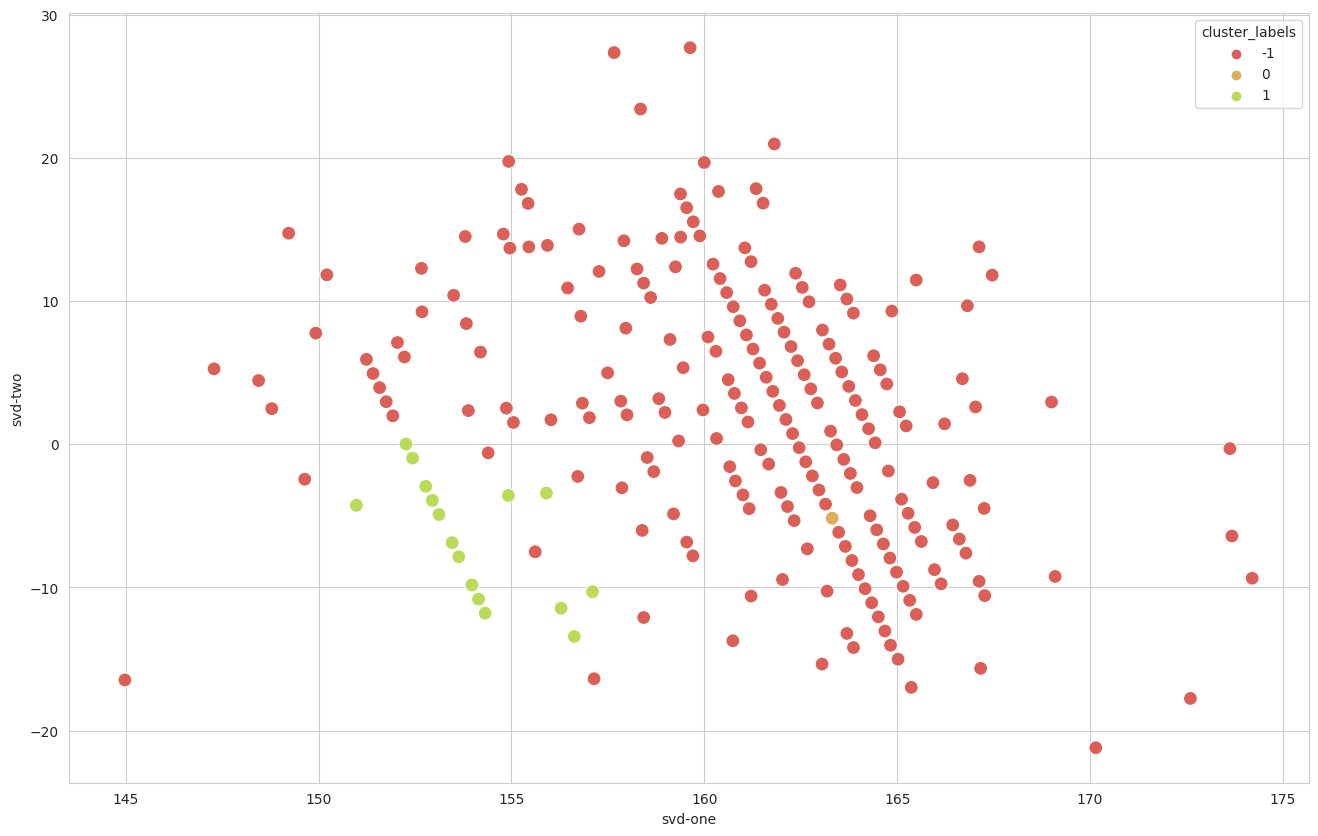

In [ ]:
# Plot dataset with 2 TruncatedSVD features, using same colour for data from each cluster
plt.figure(figsize=(16,10))
sb.scatterplot(
    x="svd-one", y="svd-two",
    hue="cluster_labels",
    palette=sb.color_palette("hls", 10),
    data=data.loc[rndperm,:],
    legend="full",
    s=100
)
#svd one in the x-axis and sdv two in the y-axis (2-Dimensional space)

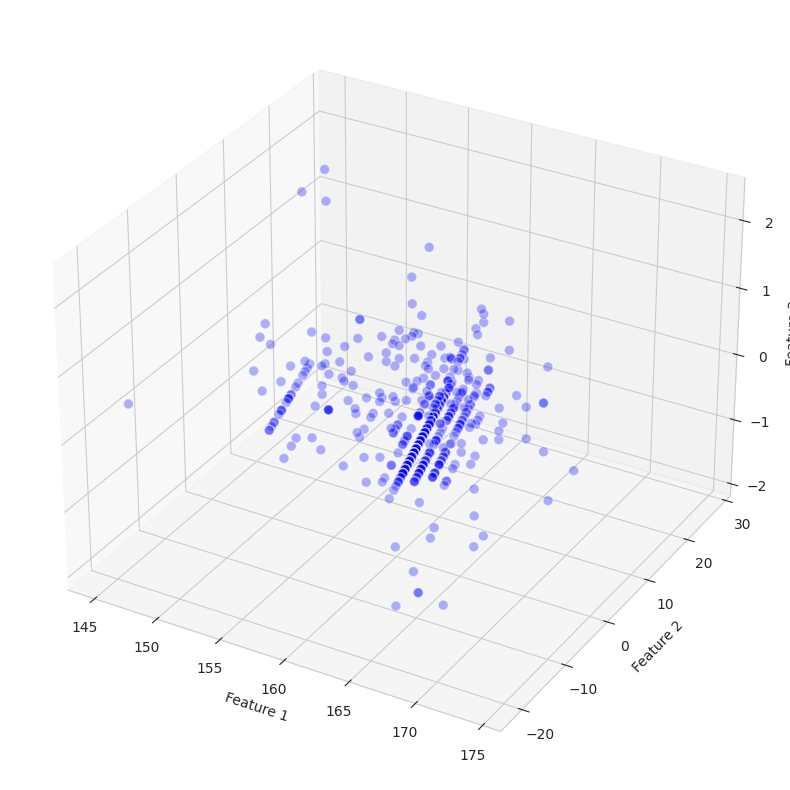

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
x = data.loc[rndperm,:]["svd-one"]
y = data.loc[rndperm,:]["svd-two"]
z = data.loc[rndperm,:]["svd-three"]
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.scatter(x, y, z,
           c='b', s=50,
           edgecolors='w',
           marker='o',
           alpha=0.3);

#Exploring the data points in a 3-Dimensional space

In [ ]:
# Create 2 components using t-SNE(t-Stochastic Neighbor Embedding)
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300,init="random")
tsne_results = tsne.fit_transform(features_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
#t-SNE a dimensionality reduction technique commonly used for visualizing high-dimensional data

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 486 samples in 0.001s...
[t-SNE] Computed neighbors for 486 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 486 / 486
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.382782
[t-SNE] KL divergence after 300 iterations: 0.539076
t-SNE done! Time elapsed: 1.439208984375 seconds


In [ ]:
#add the generated features to the table
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

In [ ]:
data

,gest_age,height,medical_surgical_history,abdominal_scars,abdominal_movement_with_respiration,abnormal_vaginal_discharge,vaginal_sores,vaginal_swelling,rh_factor,cluster_labels,svd-one,svd-two,svd-three,tsne-2d-one,tsne-2d-two
0,13,159.0,2,0,1,0,0,0,1,-1,158.898908,14.385469,-0.052767,-5.696417,-15.526615
1,39,163.0,0,0,1,0,0,0,2,-1,167.269724,-10.573767,-1.811961,-8.976120,4.441818
2,24,156.0,2,0,1,0,0,0,2,-1,157.834691,3.013837,-0.060093,1.512720,-3.992604
3,40,160.0,2,0,1,0,0,0,2,-1,164.509944,-12.060728,0.019959,-17.254330,-3.477570
4,30,155.0,2,0,1,0,0,0,1,-1,157.864068,-3.042824,0.125639,-0.764544,1.387314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,25,158.0,2,0,1,0,0,0,1,-1,159.964840,2.395149,0.052533,2.712076,-3.106511
482,13,160.0,2,0,1,0,0,0,1,-1,159.884034,14.556568,-0.064082,-5.585900,-16.151194
483,16,153.0,2,1,1,0,0,0,1,-1,153.501567,10.407581,0.465342,-5.529006,-9.370287
484,16,153.0,2,1,1,0,0,0,1,-1,153.501567,10.407581,0.465342,-5.529050,-9.370242


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

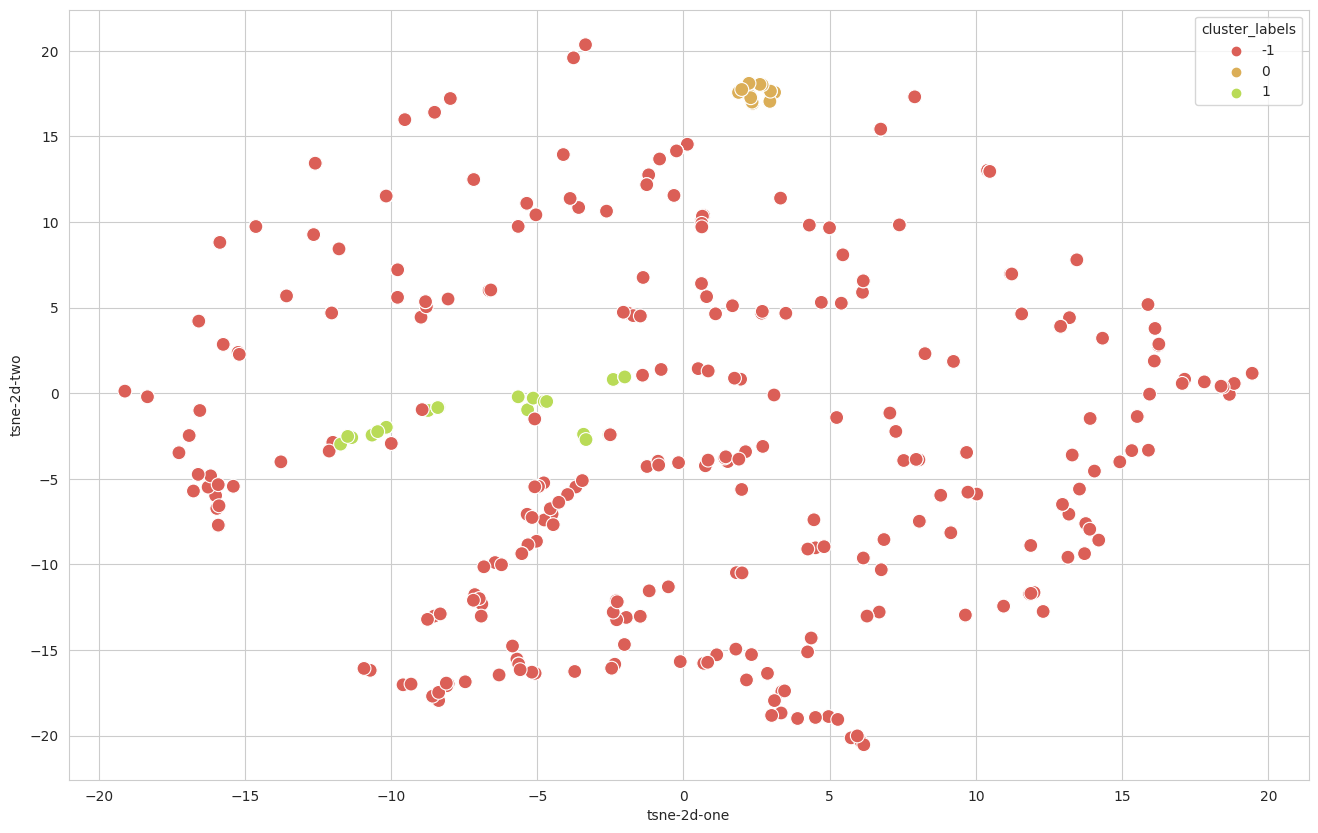

In [ ]:
# Plot dataset with 2 t-SNE features, using same colour for data from each class
plt.figure(figsize=(16,10))
sb.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sb.color_palette("hls", 10),
    data=data,
    legend="full",
    s=100
)

In [ ]:
from sklearn.cluster import DBSCAN
clusterer = DBSCAN(eps=0.0005, min_samples=10, metric='cosine')
y_pred = clusterer.fit_predict(features_df)
#Here we perform clustering using DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN algorithm clustering clusters the data points based on their density and similarity

In [ ]:
np.unique(y_pred)
#The resulting array will contain all the distinct cluster labels found in y_pred, sorted in ascending order. This can be useful for various purposes, such as identifying the number of clusters or analyzing the distribution of data points across different clusters. y_pred represents the cluster labels

array([-1,  0])

In [ ]:
np.unique(y_pred, return_counts=True)

(array([-1,  0]), array([  3, 483]))

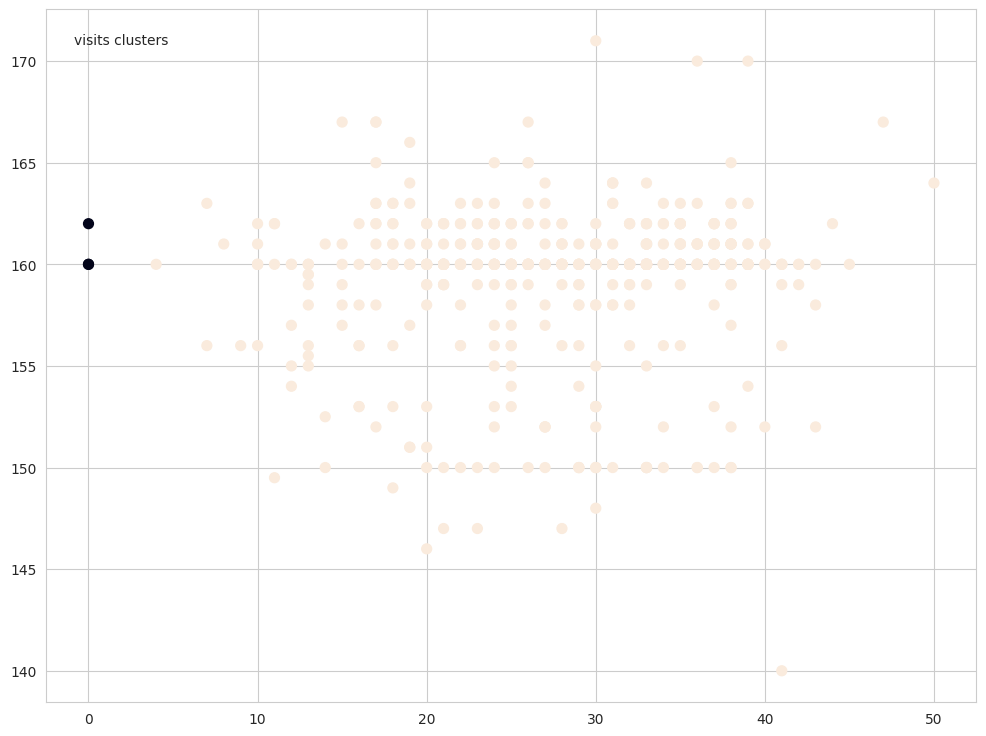

In [ ]:
plt.figure(figsize=(12,9))
plt.annotate('visits clusters', xy=(0.03, 0.95), xycoords='axes fraction')
plt.scatter(features_df.iloc[:, 0], features_df.iloc[:, 1], c=y_pred, s=50,)

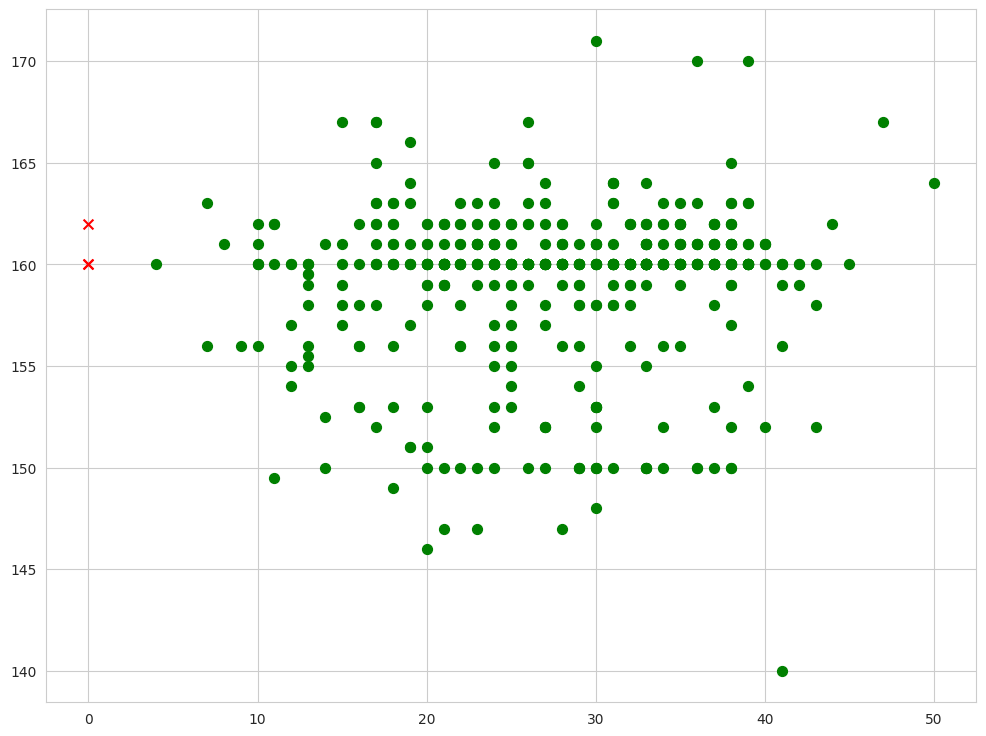

In [ ]:
#outliers vs non outliers
plt.figure(figsize=(12,9))
plt.scatter(features_df.iloc[y_pred==-1, 0], features_df.iloc[y_pred==-1, 1], c='red', s=50, marker='x')
plt.scatter(features_df.iloc[y_pred!=-1, 0], features_df.iloc[y_pred!=-1, 1], c='green', s=50)